In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
df= pd.read_csv("C:\\Users\\amish\\Git Repos\\EcoSensorConnect\\SensorReading.csv")
print(df)

              Timestamp  MQ Value
0   2024-01-30 09:05:24     533.0
1   2024-01-30 09:05:27       NaN
2   2024-01-30 09:05:28     524.0
3   2024-01-30 09:05:30     524.0
4   2024-01-30 09:05:34       NaN
5   2024-01-30 09:05:34     524.0
6   2024-01-30 09:05:37     520.0
7   2024-01-30 09:05:40     525.0
8   2024-01-30 09:05:43     522.0
9   2024-01-30 09:05:46     523.0
10  2024-01-30 09:05:49     521.0


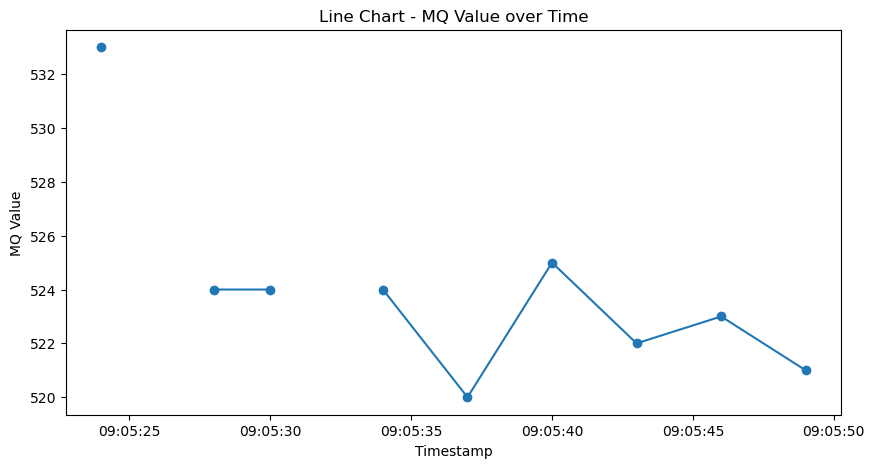

In [2]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot 1: Line Chart
plt.figure(figsize=(10, 5))
plt.plot(df['Timestamp'], df['MQ Value'], marker='o')
plt.title('Line Chart - MQ Value over Time')
plt.xlabel('Timestamp')
plt.ylabel('MQ Value')
plt.show()


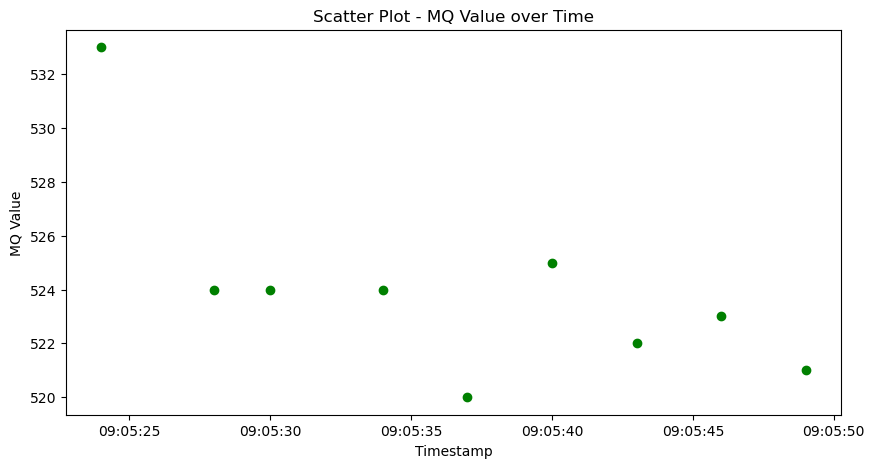

In [3]:
# Plot 2: Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(df['Timestamp'], df['MQ Value'], color='green')
plt.title('Scatter Plot - MQ Value over Time')
plt.xlabel('Timestamp')
plt.ylabel('MQ Value')
plt.show()

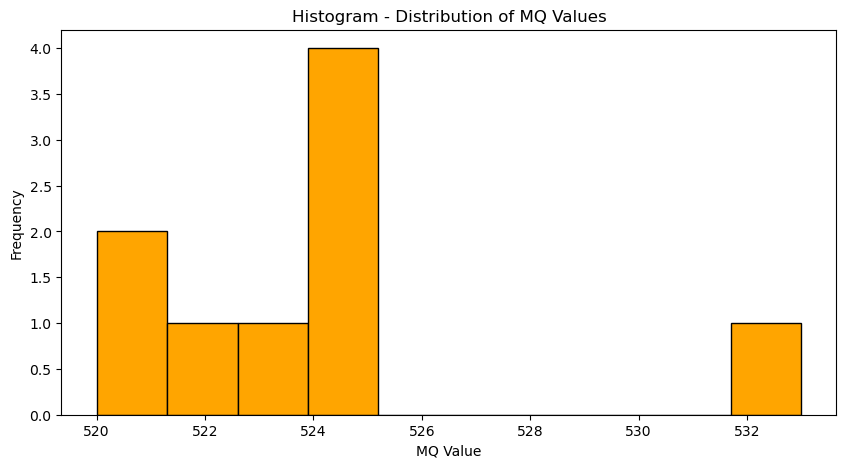

In [4]:
# Plot 3: Histogram
plt.figure(figsize=(10, 5))
plt.hist(df['MQ Value'], bins=10, color='orange', edgecolor='black')
plt.title('Histogram - Distribution of MQ Values')
plt.xlabel('MQ Value')
plt.ylabel('Frequency')
plt.show()

In [5]:
mean_value = df['MQ Value'].mean()
median_value = df['MQ Value'].median()
mode_value = df['MQ Value'].mode().iloc[0]     # Mode can have multiple values, so we take the first one
std_deviation = df['MQ Value'].std()
variance = df['MQ Value'].var()

print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")

Mean: 524.0
Median: 524.0
Mode: 524.0
Standard Deviation: 3.7416573867739413
Variance: 14.0


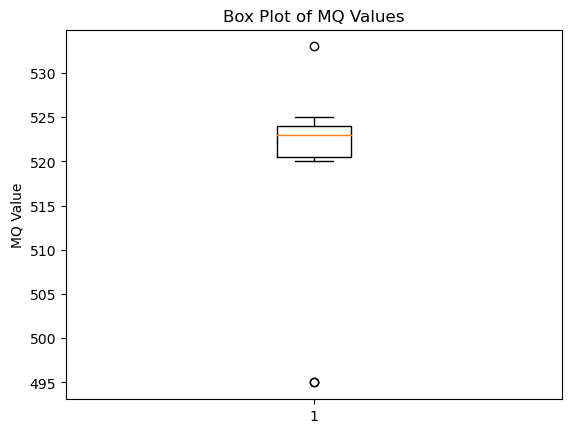

In [7]:
#Plot 4 - Box Plot
df['MQ Value'].fillna(495, inplace=True)
plt.boxplot(df['MQ Value'])
plt.title('Box Plot of MQ Values')
plt.ylabel('MQ Value')
plt.show()

C:\Users\amish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\amish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\amish\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(
C:\Users\amish\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid

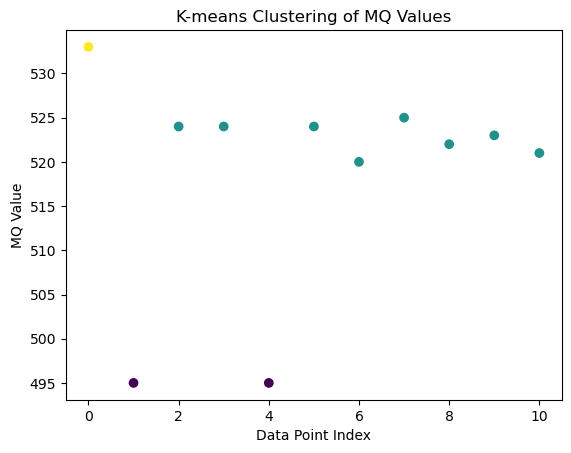

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
df['MQ Value'].fillna(495, inplace=True)
X = df[['MQ Value']]

# Specify the number of clusters 
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(df.index, df['MQ Value'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering of MQ Values')
plt.xlabel('Data Point Index')
plt.ylabel('MQ Value')
plt.show()


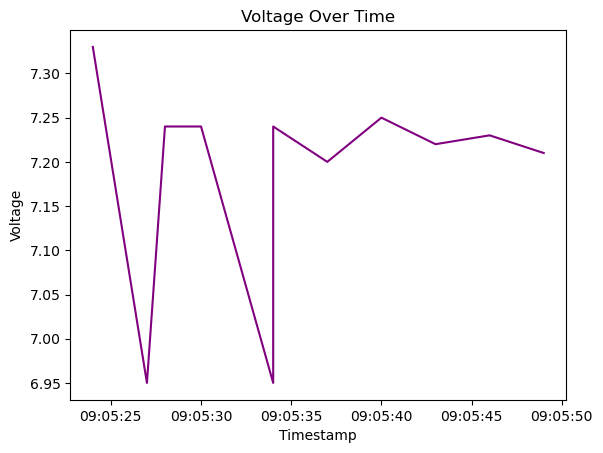

In [9]:
def calculate_voltage(mq_value, slope, intercept):
    return slope * mq_value + intercept

slope = 0.01
intercept = 2.0

# Calculate voltage for each MQ Value
df['Voltage'] = df['MQ Value'].apply(lambda x: calculate_voltage(x, slope, intercept))

# Plot the Voltage over time
plt.plot(df['Timestamp'], df['Voltage'], color= 'purple')
plt.title('Voltage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Voltage')
plt.show()


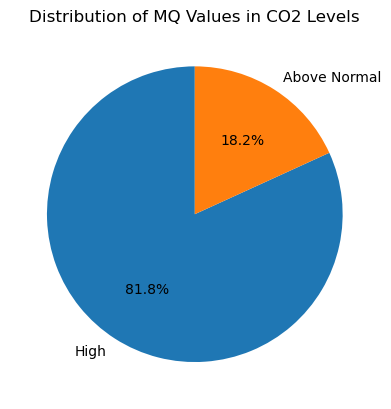

In [10]:
import matplotlib.pyplot as plt

# Categorize MQ values based on CO2 levels
def categorize_co2_level(mq_value):
    if mq_value > 500:
        return 'High'
    elif 475 <= mq_value <= 500:
        return 'Above Normal'
    elif 450 <= mq_value < 475:
        return 'Normal Outdoor Level'
    else:
        return 'Healthy'

# Apply the categorization to create a new column 'CO2 Level'
df['CO2 Level'] = df['MQ Value'].apply(categorize_co2_level)

# Count the occurrences of each CO2 level category
co2_level_counts = df['CO2 Level'].value_counts()

# Plot a pie chart
plt.pie(co2_level_counts, labels=co2_level_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of MQ Values in CO2 Levels')
plt.show()


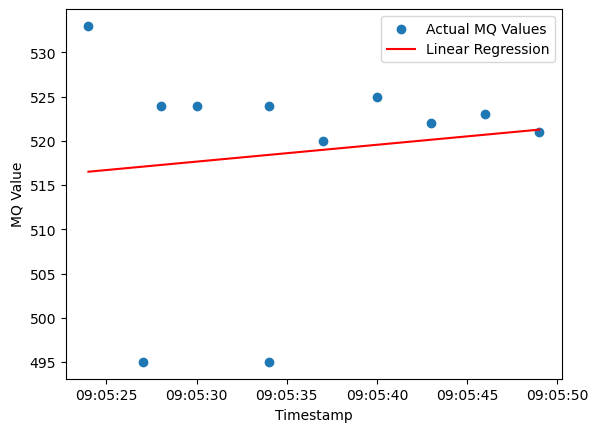

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with 'Timestamp' and 'MQ Value' columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['TimeNumeric'] = df['Timestamp'].astype(np.int64) // 10**9  # Convert timestamp to numeric for regression

# Linear Regression
model = LinearRegression()
model.fit(df[['TimeNumeric']], df['MQ Value'])

# Predict MQ values
df['MQ_Predicted'] = model.predict(df[['TimeNumeric']])

# Plotting
plt.scatter(df['Timestamp'], df['MQ Value'], label='Actual MQ Values')
plt.plot(df['Timestamp'], df['MQ_Predicted'], color='red', label='Linear Regression')
plt.xlabel('Timestamp')
plt.ylabel('MQ Value')
plt.legend()
plt.show()


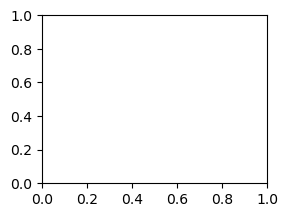

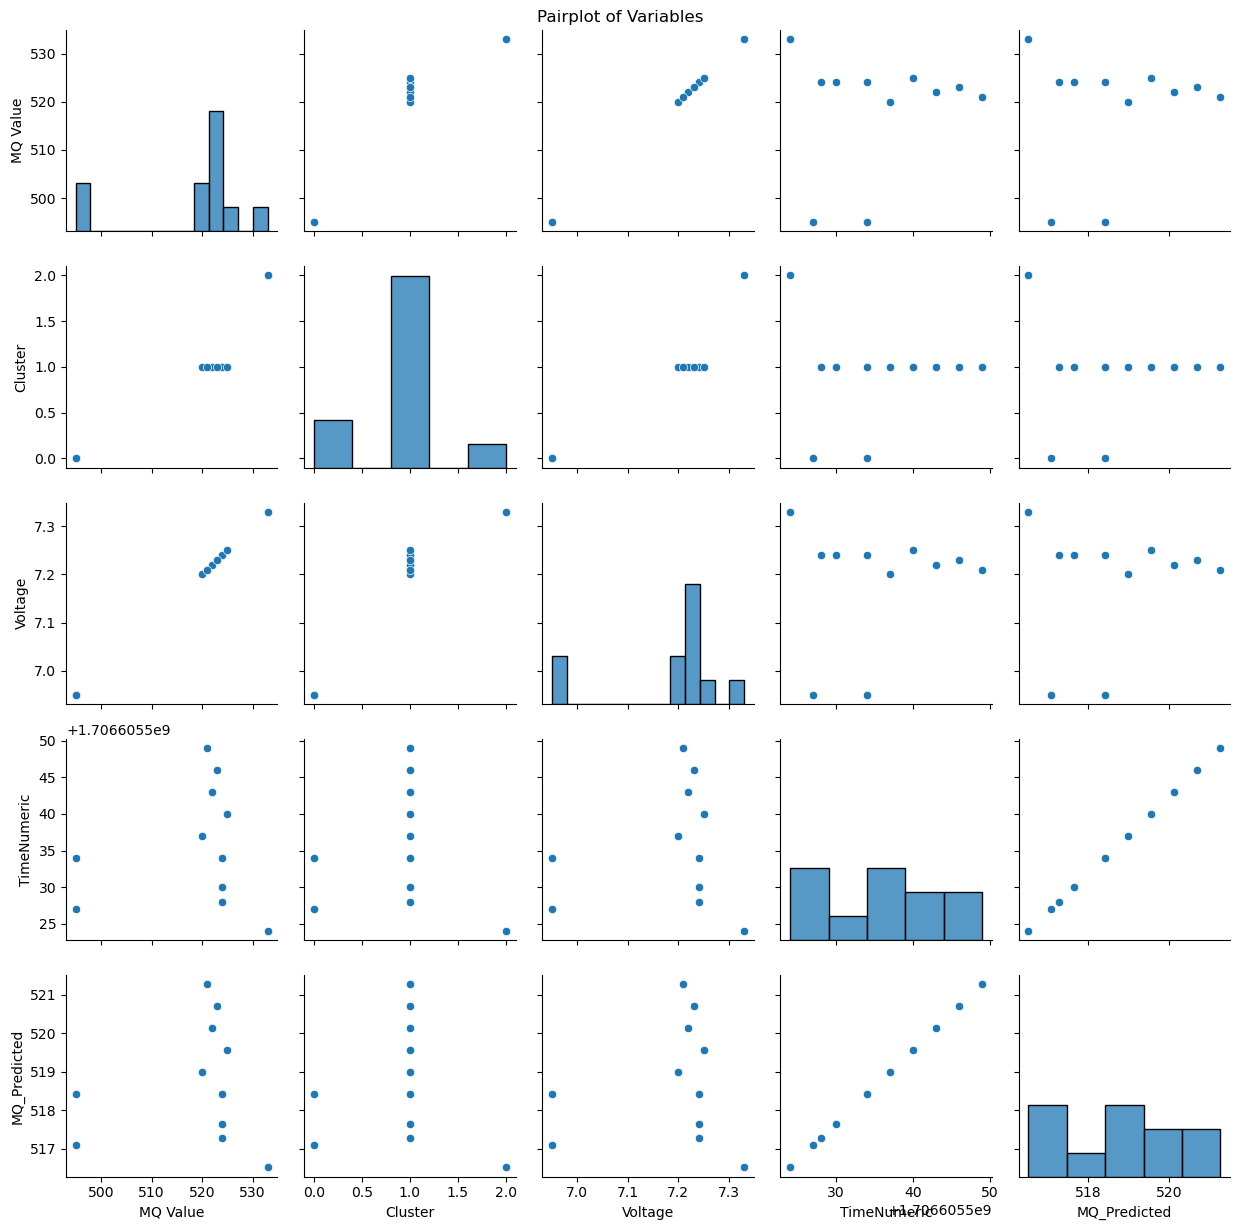

In [12]:
import seaborn as sns
# Pairplot of all variables
plt.subplot(2, 2, 4)
sns.pairplot(df)
plt.suptitle('Pairplot of Variables')

plt.tight_layout()
plt.show()